In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.svm import SVC

In [75]:
import math

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve

In [7]:
def no_session(x):
    return 1 / (1 + np.exp(-(-3 + 0.8 * x)))

In [79]:
def with_session(x):
    return 1 / (1 + np.exp(-(-3 + 0.8 * x+1.5)))

In [10]:
x_values = np.linspace(0, 10, 100)

In [11]:
probabilities_nosesh = no_session(x_values)

In [12]:
probabilities_withsesh = with_session(x_values)

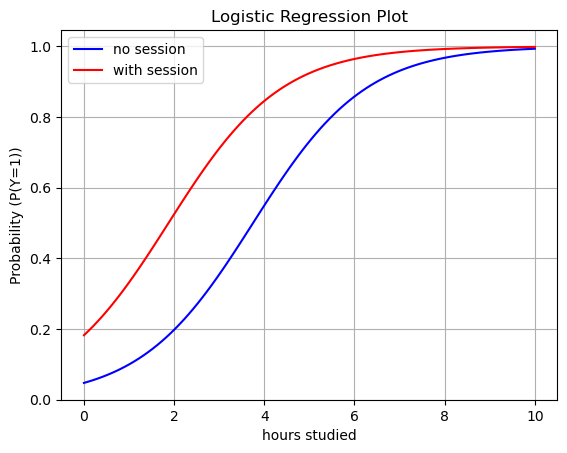

In [13]:
plt.plot(x_values, probabilities_nosesh, label='no session', color='blue')
plt.plot(x_values, probabilities_withsesh, label='with session', color='red')
plt.xlabel("hours studied")
plt.ylabel("Probability (P(Y=1))")
plt.title("Logistic Regression Plot")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
data= pd.read_csv('student_data.csv');
data_review_session=data[data['Review_Session'] == 1]
data_no_review=data[data['Review_Session'] == 0]

In [17]:
x=data_review_session["Hours_Studied"]
y=data_review_session["Results"]

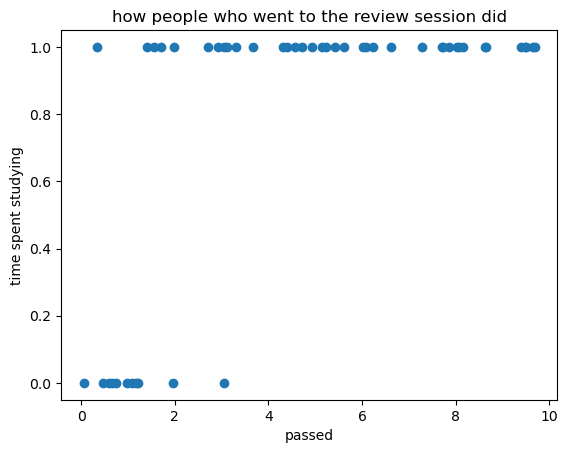

In [18]:
# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('passed')
plt.ylabel('time spent studying')
plt.title('how people who went to the review session did')

# Show the plot
plt.show()

In [19]:
x=data_no_review["Hours_Studied"]
y=data_no_review["Results"]

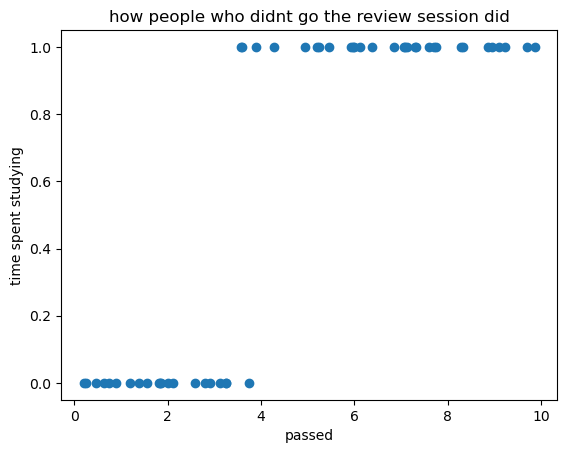

In [20]:


# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('passed')
plt.ylabel('time spent studying')
plt.title('how people who didnt go the review session did')

# Show the plot
plt.show()

In [21]:
X = data[['Hours_Studied', 'Review_Session']]  # Specify the columns you want to use as features
y = data['Results']

In [22]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [23]:
y_pred = model.predict(X)

In [24]:
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)
confusion = confusion_matrix(y, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.97      0.93      0.95        68

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix:
 [[30  2]
 [ 5 63]]


In [25]:
intercept = model.intercept_[0]
coefficients = model.coef_[0]

# Print the results
print("Intercept (beta0):", intercept)
print("Coefficients (beta1, beta2, ...):", coefficients)

Intercept (beta0): -4.611824619849803
Coefficients (beta1, beta2, ...): [1.36499215 1.87733756]


/tmp/ipykernel_207/2275239135.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random')


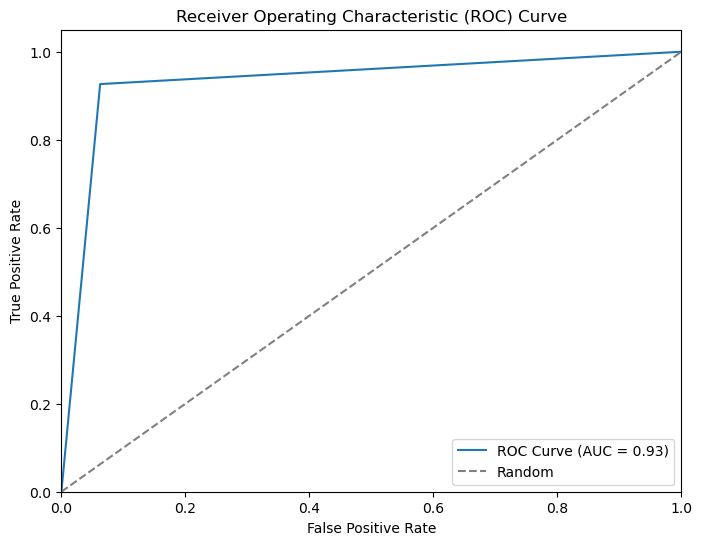

In [26]:
auc = roc_auc_score(y, y_pred)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
linearmodel = SVC(kernel='linear', C=1.0)  # You can choose a different kernel (e.g., 'rbf') and adjust other hyperparameters
linearmodel.fit(X, y)

SVC(kernel='linear')

In [28]:
y_pred = linearmodel.predict(X)

In [29]:
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)
confusion = confusion_matrix(y, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.98      0.90      0.94        68

    accuracy                           0.92       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100

Confusion Matrix:
 [[31  1]
 [ 7 61]]


In [30]:
param_grid = {'gamma': [0.1, 1, 10]}
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5)

In [31]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'gamma': [0.1, 1, 10]})

In [32]:
best_gamma = grid_search.best_params_['gamma']
best_svm = grid_search.best_estimator_
accuracy = best_svm.score(X, y)

print("Best Gamma:", best_gamma)
print("Best SVM Model:", best_svm)
print("Accuracy on Test Data:", accuracy)

Best Gamma: 0.1
Best SVM Model: SVC(gamma=0.1)
Accuracy on Test Data: 0.93


In [33]:
rbfsvm = SVC(kernel='rbf',gamma=best_gamma)

In [34]:
rbfsvm.fit(X,y)

SVC(gamma=0.1)

In [35]:
y_pred = rbfsvm.predict(X)

In [36]:
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)
confusion = confusion_matrix(y, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.97      0.93      0.95        68

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix:
 [[30  2]
 [ 5 63]]
